# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

Note

Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip  install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Start")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("not found...")
        pass
              

print("Finished")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kenai
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | praya
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | kathmandu
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | gamba
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | kourou
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | khani
Processing Record 21 of Set 1 | albany
Pro

Processing Record 36 of Set 4 | klaksvik
Processing Record 37 of Set 4 | xam nua
Processing Record 38 of Set 4 | mayo
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | rosetown
Processing Record 41 of Set 4 | sorong
Processing Record 42 of Set 4 | raudeberg
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | stephenville crossing
Processing Record 45 of Set 4 | kambove
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | chapais
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | kushima
Processing Record 0 of Set 5 | cerkezkoy
Processing Record 1 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 2 of Set 5 | falam
Processing Record 3 of Set 5 | thinadhoo
Processing Record 4 of Set 5 | mwinilunga
Processing Record 5 of Set 5 | balimo
City not found. Skipping...
Processing Record 6 of Set 5 | xingyi
Processing Record 7 of Set 5 | whitecourt
Processing Record 

Processing Record 23 of Set 8 | lokosovo
Processing Record 24 of Set 8 | sao gabriel da cachoeira
Processing Record 25 of Set 8 | kuloy
Processing Record 26 of Set 8 | dale
Processing Record 27 of Set 8 | xining
Processing Record 28 of Set 8 | alamos
Processing Record 29 of Set 8 | kalinovskaya
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | parrita
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | sao jose dos campos
Processing Record 34 of Set 8 | karpathos
Processing Record 35 of Set 8 | kudat
Processing Record 36 of Set 8 | moiyabana
City not found. Skipping...
Processing Record 37 of Set 8 | lashio
Processing Record 38 of Set 8 | palana
Processing Record 39 of Set 8 | aberdeen
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | manyana
Processing Record 42 of Set 8 | rafai
Processing Record 43 of Set 8 | ahuimanu
Processing Record 44 of Set 8 | dolores
Processing Record 45 of Set 8 | udachnyy
Processing Recor

Processing Record 10 of Set 12 | hualmay
Processing Record 11 of Set 12 | guekedou
City not found. Skipping...
Processing Record 12 of Set 12 | soldato-aleksandrovskoye
Processing Record 13 of Set 12 | tawkar
City not found. Skipping...
Processing Record 14 of Set 12 | madison heights
Processing Record 15 of Set 12 | pimentel
Processing Record 16 of Set 12 | ouadda
Processing Record 17 of Set 12 | iskateley
Processing Record 18 of Set 12 | sangin
Processing Record 19 of Set 12 | qovlar
Processing Record 20 of Set 12 | hun
Processing Record 21 of Set 12 | mustla
Processing Record 22 of Set 12 | riyadh
Processing Record 23 of Set 12 | tynda
Processing Record 24 of Set 12 | pudozh
Processing Record 25 of Set 12 | tucuma
City not found. Skipping...
Processing Record 26 of Set 12 | clyde river
Processing Record 27 of Set 12 | monte patria
Processing Record 28 of Set 12 | aquiraz
Processing Record 29 of Set 12 | turukhansk
Processing Record 30 of Set 12 | sept-iles
Processing Record 31 of Se

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kenai,1,US,1556429224,31,60.55,-151.26,51.80,4.70
1,georgetown,0,GY,1556424000,88,6.80,-58.16,77.00,6.93
2,rikitea,68,PF,1556429323,84,-23.12,-134.97,76.18,20.98
3,praya,40,ID,1556427600,62,-8.71,116.27,87.80,8.05
4,dikson,100,RU,1556429324,84,73.51,80.55,20.20,16.02


## Latitude vs. Temperature Plot

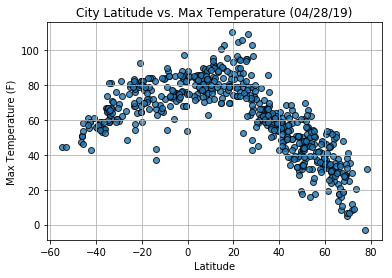

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lattemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

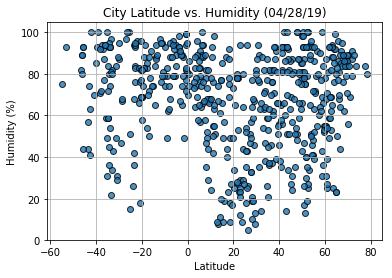

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lathum.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

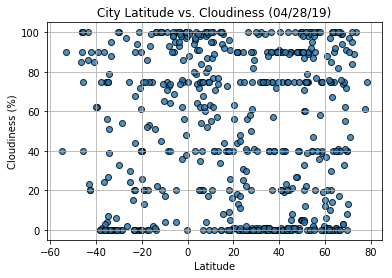

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latcloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

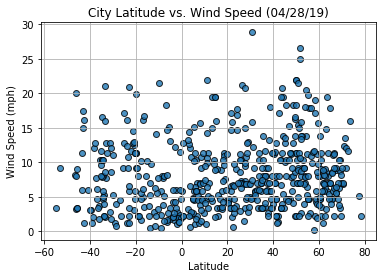

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latwind.png")

# Show plot
plt.show()